In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('candy-data.csv')


<b> Dataset consist of the following variables: </b> 

1. chocolate | Does it contain chocolate?
2. fruity | Is it fruit flavored?
3. caramel | Is there caramel in the candy?
4. peanutalmondy | Does it contain peanuts, peanut butter or almonds?
5. nougat | Does it contain nougat?
6. crispedricewafer | Does it contain crisped rice, wafers, or a cookie component?
7. hard | Is it a hard candy?
8. bar | Is it a candy bar?
9. pluribus | Is it one of many candies in a bag or box?
10. sugarpercent | The percentile of sugar it falls under within the data set.
11. pricepercent | The unit price percentile compared to the rest of the set.
12. winpercent | The overall win percentage according to 269,000 matchups.

For binary variables, 1 means yes, 0 means no.

<b> Print the dataset shape </b>

In [48]:
df.shape

(85, 13)

<b> Print first 5 rows of dataset </b>

In [49]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [125]:
df.tail()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113


In [50]:
# Check for null values in the df

In [51]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


## EDA

Exploring visually how the different candies compare according to the contents. <br>
Which candy is more likely to win a matchup against its competitors based on its contents?


# make subplot

In [124]:
df[df.columns[1:-3]].agg(['sum'])

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
sum,37,38,14,14,7,7,15,21,44


<b> Which characteristics, ingredients(chocolate, fruity, caramel, peanutyalmondy) or physical(nougat, crispedricewafer, hard) or quantity(bar, pluribus) appear more frequently? </b>

1. Ingredients: <br>
--> fruit appears most frequently appearing ingredient
--> do fruits and chocolates go together? 
--> do chocolates and caramel go together?
--> what about peanuts? <br> 
2. Physical:
--> 

3. quantity: <b>
Most of the candies are not bars, but rather appear in packets similar to M&Ms
    

0    48
1    37
Name: chocolate, dtype: int64


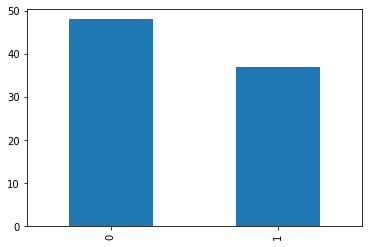

In [53]:
#How many candies contain chocolate?
df['chocolate'].value_counts().plot(kind= 'bar')
print(df['chocolate'].value_counts())

0    47
1    38
Name: fruity, dtype: int64


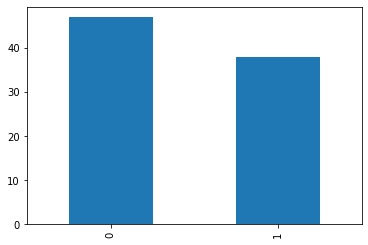

In [54]:
#How many candies contain a fruity element?
df['fruity'].value_counts().plot(kind= 'bar')
print(df['fruity'].value_counts())

0    78
1     7
Name: nougat, dtype: int64


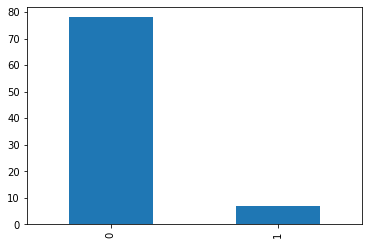

In [55]:
#How many candies contain nougat?
df['nougat'].value_counts().plot(kind= 'bar')
print(df['nougat'].value_counts())

0    71
1    14
Name: peanutyalmondy, dtype: int64


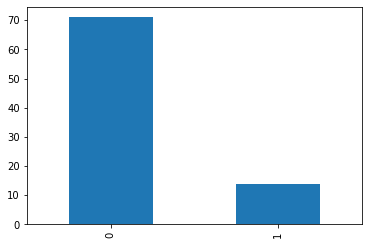

In [56]:
#How mmany candies contrain peanutyalmondy element?
df['peanutyalmondy'].value_counts().plot(kind= 'bar')
print(df['peanutyalmondy'].value_counts())


0    78
1     7
Name: crispedricewafer, dtype: int64


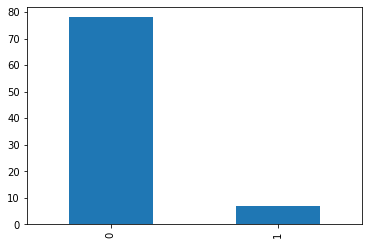

In [57]:
#How many candies contain crispedricewafer?
df['crispedricewafer'].value_counts().plot(kind= 'bar')
print(df['crispedricewafer'].value_counts())


0    70
1    15
Name: hard, dtype: int64


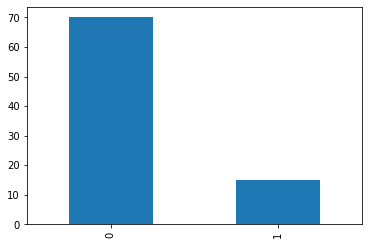

In [58]:
#How many candies are hard?
df['hard'].value_counts().plot(kind= 'bar')
print(df['hard'].value_counts())

0    64
1    21
Name: bar, dtype: int64


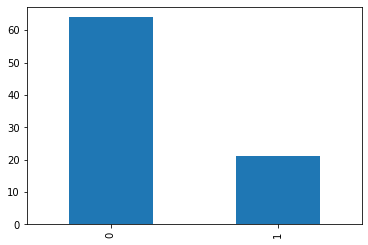

In [59]:
#How many candies contain bars?
df['bar'].value_counts().plot(kind= 'bar')
print(df['bar'].value_counts())

<AxesSubplot:xlabel='winpercent', ylabel='competitorname'>

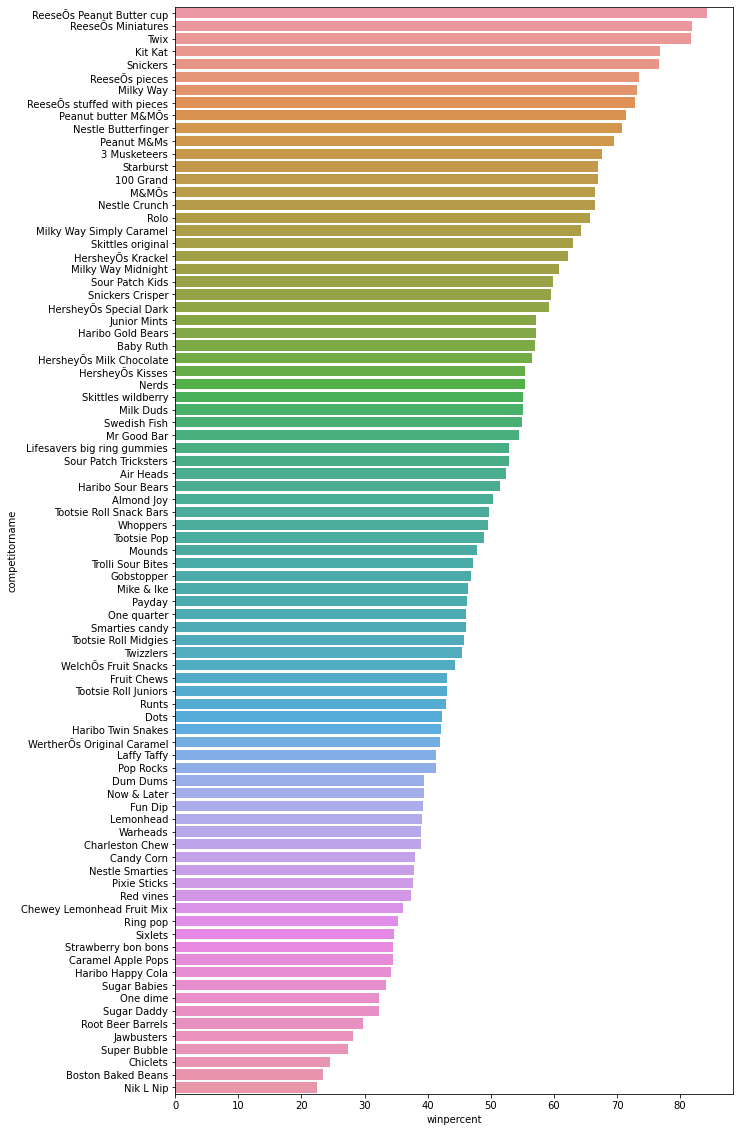

In [23]:
# To check if there are absolute out-and-out winners? 

plt.figure(figsize=(10,20))
sns.barplot(x = df['winpercent'], y = df['competitorname'], order = df.sort_values('winpercent',ascending = False).competitorname)

there are no outright winners or losers according to winpercent, however, a large number of the top 10 candies (6?) contain peanut/ peanut butter. 

also, Reese's peanture butter cup seems to come out on top > 70 percent of the time it comes up in a match up

In [126]:
# z = []
# for i in df['pricepercent']:
#     if i > 0.70:
#         print(i)
#         z.append(i)

In [122]:
d = df[df['winpercent'] > 65]

In [144]:
top_10_winners =  df.sort_values('winpercent', ascending=False)[:20]
sum_total_occurrence = top_10_winners.agg(['sum'])

In [157]:
sum_total_occurrence = sum_total_occurrence.drop(['competitorname'], axis = 1)

In [158]:
sum_total_occurrence

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
sum,18,2,6,8,3,5,0,10,7,12.0,12.887,1422.33557


In [133]:
# Which are the top 10 candies according to "winpercent"
df.sort_values('winpercent', ascending=False)[:20]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [134]:
# Which are the lowest 10 candies according to "winpercent"
df.sort_values('winpercent', ascending=True)[:20]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
71,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
19,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958


<b> How do the different ingredients compare with: </b>
1. pricepercent
2. winpercent
3. sugarpercent?

<b> how does sugarcontent compare with pricepercent? </b>

<b> how does sugarcontent compare with winpercent? </b>

<b> how does price compare with winpercent? </b>